C:\Users\glenn\AppData\Local\Temp\ipykernel_29740\2052831269.py:27: OptimizeWarning: Covariance of the parameters could not be estimated
  parametersX, covarianceX = curve_fit(linearFunc, np.arange(15,maxImages,5), front_array_absolute[:,0])


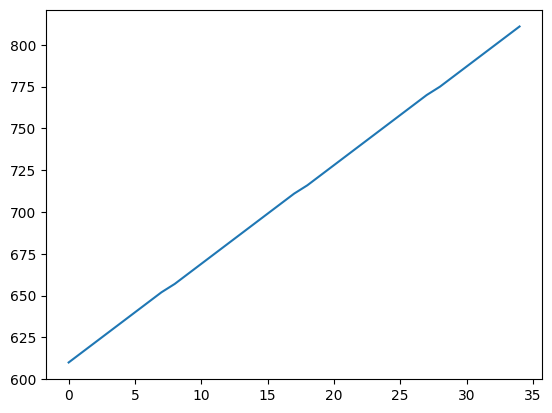

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit


# Array of the front of the CME through human analysis
# A linear fit is applied to the data to interpolate the front at each time step
maxImages = 50


front_array_absolute = [[512,608],[512,640],[512,671],[512,702],[512,730],[512,761],[512,783]]


                                                           
front_array_absolute = np.array(front_array_absolute)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,maxImages,5), front_array_absolute[:,1])
parametersX, covarianceX = curve_fit(linearFunc, np.arange(15,maxImages,5), front_array_absolute[:,0])
front_array_absolute = np.zeros((maxImages-15,2), dtype=int)
front_array_absolute[:,0] = np.floor((linearFunc(np.arange(15,maxImages), *parametersX)))
front_array_absolute[:,1] = np.floor((linearFunc(np.arange(15,maxImages), *parameters)))


# Plot the front of the CME as a function of timestep
plt.figure()
plt.plot(front_array_absolute[:,1])
plt.show()


# Define the region of interest depending on where the CME is located

# xMin = 0
# xMax = 500
xMin = 512
xMax = 1000

# yMin = 512
# yMax = 1000

yMin = 250
yMax = 750

pBdata = []
tBdata =[]

for i in range(15,maxImages,1):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\cme0.h5_dcmer_090E_bang_0000_pB_iso_stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\cme0.h5_dcmer_090E_bang_0000_tB_iso_stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

epsilonArray = np.zeros(len(pBdata))


In [3]:

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat, epsilonArray[i]= calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax), front_array_absolute[i,:], type = 'Xi')
    posMats[i] = posMat
    negMats[i] = negMat

Processing calculations for image  0


c:\Users\glenn\Documents\CME-polarization\Scripts_CME_0_Isolated\helper_funcs.py:18: RuntimeWarning: invalid value encountered in divide
  pBratioFull = image_data_pB/image_data_tB


Processing calculations for image  1
Processing calculations for image  2
Processing calculations for image  3
Processing calculations for image  4
Processing calculations for image  5
Processing calculations for image  6
Processing calculations for image  7
Processing calculations for image  8
Processing calculations for image  9
Processing calculations for image  10
Processing calculations for image  11
Processing calculations for image  12
Processing calculations for image  13
Processing calculations for image  14
Processing calculations for image  15
Processing calculations for image  16
Processing calculations for image  17
Processing calculations for image  18
Processing calculations for image  19
Processing calculations for image  20
Processing calculations for image  21
Processing calculations for image  22
Processing calculations for image  23
Processing calculations for image  24
Processing calculations for image  25
Processing calculations for image  26
Processing calculatio

[22.83464052 23.83776222 24.80315213 25.76287134 26.57060413 27.28625132
 28.02150827 28.71767295 29.59074476 30.24089973 30.86515007 31.44576785
 32.08619829 32.62649571 33.17301897 33.70330494 34.27872561 34.7435921
 35.39748068 35.83596698 36.23246658 36.62472821 37.12567771 37.42010191
 37.79015852 38.50757675 38.42785814 38.73998622 39.42239105 39.84180978
 40.33912231 40.91701151 41.48643669 42.19078379 43.03545971]
[-5.60807802 -5.55651222 -5.46721463 -5.37224634 -5.12529163 -4.78625132
 -4.46682077 -4.10829795 -4.10246351 -3.69793098 -3.26749382 -2.7934241
 -2.37916704 -1.86477696 -1.35661272 -0.83221119 -0.35248897  0.23731831
  0.46232516  1.07851404  1.73669032  2.39910519  2.95283278  3.71308619
  4.39770769  4.73496802  5.86936563  6.61191694  6.80841189  7.4436732
  8.00104104  8.47783252  8.9630883   9.31342242  9.52342799]
pos m:  0.5435577121633692
pos b:  24.75732967770168
pos mean:  33.99781078447896
pos sigma: 5.536667699775166
neg m:  0.4934672715663703
neg b:  -7.

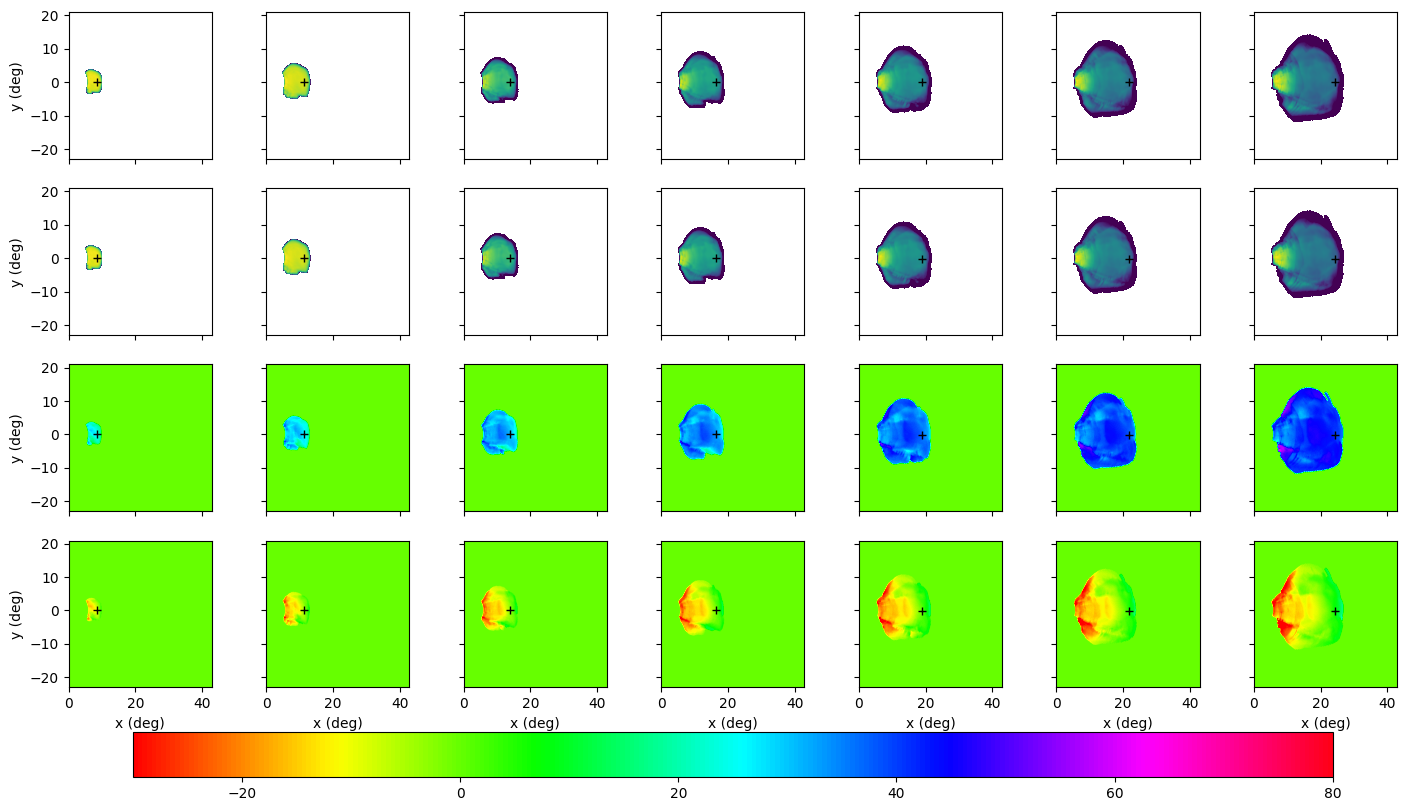

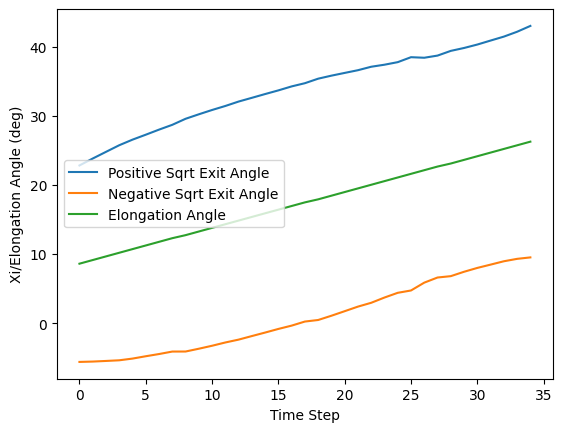

In [4]:
# xMin = 0
# xMax = 500
xMin = 512
xMax = 1000

yMin = 250
yMax = 750

# yMin = 512
# yMax = 1000


# vmin = 60
# vmax = 150
vmin = -30
vmax = 80

front_array_adj = front_array_absolute - np.array([512,512])
#plot the images with the front of the CME marked

fig, axs = plt.subplots(4,7,figsize=(15, 9), sharex=True, sharey=True)



for i in range(7): 
    
    axs[0,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm(), extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0],)
    axs[1,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm(), extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    axs[2,i].imshow(posMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin = vmin, vmax=vmax, cmap='hsv', extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    im = axs[3,i].imshow(negMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv', extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    
for i in range(4):
    axs[i,0].set_ylabel('y (deg)')
    

for i in range(7):
    axs[3,i].set_xlabel('x (deg)')



for i in range(7):
    axs[0,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[1,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[2,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[3,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')


xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
print(posMatsGraph)
print(negMatsGraph)

posCoef = np.polyfit(np.arange(0,maxImages-15),posMatsGraph,1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(posMatsGraph))
print("pos sigma:", np.std(posMatsGraph))



negCoef = np.polyfit(np.arange(0,maxImages-15),negMatsGraph,1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(negMatsGraph))
print("neg sigma:", np.std(negMatsGraph))
# poly1d_fn = np.poly1d(posCoef) 


fig, axs = plt.subplots()  
axs.plot(posMatsGraph, label='Positive Sqrt Exit Angle')
axs.plot(negMatsGraph, label='Negative Sqrt Exit Angle') 
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='center left') 
plt.show()



[[1.01509817 0.15375986]
 [1.01590215 0.16346004]
 [1.01657548 0.17318156]
 [1.01720332 0.18293785]
 [1.01727778 0.19263328]
 [1.01693716 0.20228138]
 [1.01655737 0.21195042]
 [1.01591621 0.22159262]
 [1.01648928 0.22989877]
 [1.0154801  0.23951575]
 [1.01422092 0.24909455]
 [1.01261818 0.2586058 ]
 [1.0111418  0.2681658 ]
 [1.0090372  0.27757252]
 [1.00679547 0.28694908]
 [1.00430342 0.29625975]
 [1.00188011 0.30560043]
 [0.99869649 0.31470489]
 [0.99739584 0.32272503]
 [0.99375581 0.33168159]
 [0.98967671 0.34047509]
 [0.98537095 0.34916882]
 [0.98153298 0.35801055]
 [0.97622902 0.36629091]
 [0.97118869 0.37463238]
 [0.96821348 0.38375872]
 [0.95983639 0.39069811]
 [0.95380619 0.39851547]
 [0.95150846 0.40615509]
 [0.9458977  0.41409312]
 [0.94066149 0.42215978]
 [0.93584787 0.43039091]
 [0.93083642 0.43850985]
 [0.9266895  0.44702388]
 [0.92349853 0.45600922]]


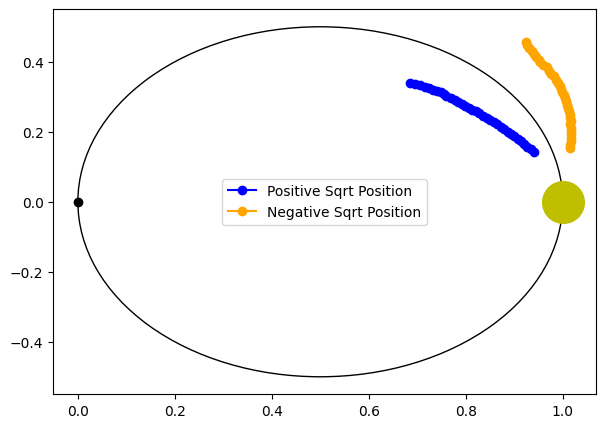

In [5]:
plt.figure(figsize=(7,5))
plt.plot(0,0, 'ko')
plt.plot(1,0, 'yo', markersize=30)

posPositionArray = np.zeros((len(posMatsGraph),2))
for i in range(len(posMatsGraph)):
    xi = posMatsGraph[i]
    epsilon = epsilonArray[i]
    cotXi = 1/np.tan(np.radians(xi))
    # print("cotXi = ", cotXi)
    tanE = np.tan(np.radians(epsilon))
    # print("tanE = ", tanE)
    x = cotXi/(tanE + cotXi)
    y = tanE*x
    posPositionArray[i] = np.array([x,y])

plt.plot(posPositionArray[:,0],posPositionArray[:,1],color='blue', marker="o", label='Positive Sqrt Position')

negPositionArray = np.zeros((len(negMatsGraph),2))
for i in range(len(posMatsGraph)):
    xi = negMatsGraph[i]
    epsilon = epsilonArray[i]
    cotXi = 1/np.tan(np.radians(xi))
    # print("cotXi = ", cotXi)
    tanE = np.tan(np.radians(epsilon))
    # print("tanE = ", tanE)
    x = cotXi/(tanE + cotXi)
    y = tanE*x
    negPositionArray[i] = np.array([x,y])
print(negPositionArray)
plt.plot(negPositionArray[:,0],negPositionArray[:,1],color='orange', marker="o", label='Negative Sqrt Position')
thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
plt.gca().add_patch(thomson)
# plt.xlim(-0.05,1.05)
# plt.ylim(-0.05,0.5)
plt.legend()
plt.show()

np.save('output/outputXiPos.npy', posMatsGraph)
np.save('output/outputXiNeg.npy', negMatsGraph)
np.save('output/outputEpsilon.npy', epsilonArray)